Autor: Martín de las Heras

## Cuaderno Prácticas 1

En primer lugar importamos las librerías que vamos a utilizar a lo largo de la práctica

In [5]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt

# Preprocesado y modelado
# ==============================================================================
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

### Ejercicio 1.1
En un estudio de eficacia de un sistema operativo se está tratando de ver la relación entre el porcentaje de utilización de la CPU, Y, y el número de programas que se encuentran en ejecución, X. Para ello se seleccionaron los siguientes datos:

In [6]:
# Datos
# ==============================================================================
inputs = [1,2,3,4,5,6,7,8,9,10]
outputs = [20,36,48,60,66,74,80,84,87,89]

Y los representamos en una gráfica:

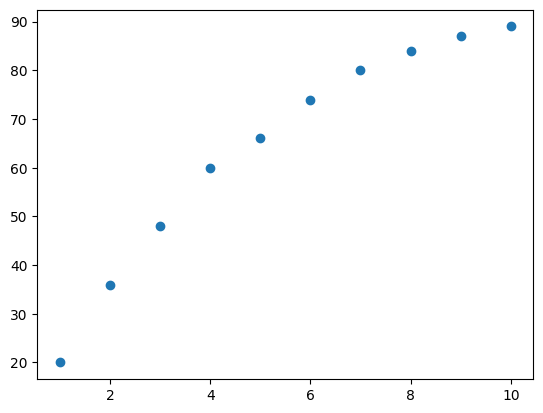

In [7]:
plt.scatter(inputs, outputs)
plt.show()

En esta gráfica vemos que probablemente se pueda estimar con un error relativamente bajo, ya que están sobre una recta.

Una vez tenemos esto, definimos el dataset a utilizar y lo dividimos en entrenamiento y test:

In [8]:
datos = pd.DataFrame({'inputs': inputs, 'outputs': outputs})

# División de los datos en train y test
# ==============================================================================
X = datos[['inputs']]
y = datos['outputs']

X_train, X_test, y_train, y_test = train_test_split(
                                        X.values.reshape(-1,1),
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

Definimos el modelo, realizamos el ajuste e imprimimos los resultados:

In [9]:
# Creación del modelo
# ==============================================================================
modelo = LinearRegression()
modelo.fit(X = X_train.reshape(-1, 1), y = y_train)

# Información del modelo
# ==============================================================================
print("Recta de regresión: y=%.2f+%.2f*X" % (modelo.intercept_[0], modelo.coef_.flatten()[0]))
# Correlación lineal entre las dos variables
# ==============================================================================
corr_test = pearsonr(x = datos['inputs'], y =  datos['outputs'])
print("Coeficiente de correlación de Pearson: ", corr_test[0])
print("Coeficiente de determinación R^2:", modelo.score(X, y))

Recta de regresión: y=22.91+7.47*X
Coeficiente de correlación de Pearson:  0.9636971139268111
Coeficiente de determinación R^2: 0.9283574391342052


Se puede ver con la recta y con los coeficientes que están claramente correladas, dado que tenemos el coeficiente de correlación de Pearson cercano a 1 y un coeficiente de determinación R^2 también en un valor cercano al 1.
Podemos ver también que se trata de una recta con pendiente positiva, lo cual indica una relación directa.

### Ejercicio 1.2
PROAUTO es una reconocida cadena de atención al automóvil donde el análisis para cada día del tiempo medio de espera de un vehículo hasta ser atendido, en horas, variable Y, y el número de empleados trabajando ese día, X; a lo largo de 6 días ha proporcionado la siguiente información:

In [10]:
# Datos
# ==============================================================================
inputs = [30,27,24,32,20,35]
outputs = [0.5,1,0.9,0.6,1.2,0.4]

Y los representamos en una gráfica:

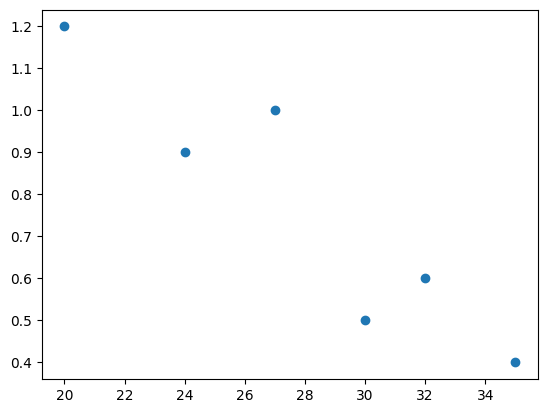

In [11]:
plt.clf()
plt.scatter(inputs, outputs)
plt.show()

En esta gráfica vemos que probablemente se pueda estimar con un error relativamente bajo, ya que están sobre una recta.

Una vez tenemos esto, definimos el dataset a utilizar y lo dividimos en entrenamiento y test:

In [12]:
datos = pd.DataFrame({'inputs': inputs, 'outputs': outputs})

# División de los datos en train y test
# ==============================================================================
X = datos[['inputs']]
y = datos['outputs']

X_train, X_test, y_train, y_test = train_test_split(
                                        X.values.reshape(-1,1),
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

Definimos el modelo, realizamos el ajuste e imprimimos los resultados:

In [13]:
# Creación del modelo
# ==============================================================================
modelo = LinearRegression()
modelo.fit(X = X_train.reshape(-1, 1), y = y_train)

# Información del modelo
# ==============================================================================
print("Recta de regresión: y=%.2f%.2f*X" % (modelo.intercept_[0], modelo.coef_.flatten()[0]))
# Correlación lineal entre las dos variables
# ==============================================================================
corr_test = pearsonr(x = datos['inputs'], y =  datos['outputs'])
print("Coeficiente de correlación de Pearson: ", corr_test[0])
print("Coeficiente de determinación R^2:", modelo.score(X, y))

Recta de regresión: y=2.24-0.05*X
Coeficiente de correlación de Pearson:  -0.9299811099505544
Coeficiente de determinación R^2: 0.8573489458787593


Se puede ver con la recta y con los coeficientes que están claramente correladas, dado que tenemos el coeficiente de correlación de Pearson cercano a -1 y un coeficiente de determinación R^2 también en un valor cercano al 1.
Podemos ver también que se trata de una recta con pendiente negativa, lo cual indica una relación inversa.

### Ejercicio 1.3
La valoración de bienes inmuebles es uno de los ámbitos donde se está utilizando la IA y los modelos de AS basados en regresión lineal simple y múltiple. Para ello se realiza una regresión lineal múltiple con el siguiente código:

``` python
import pandas
from sklearn import linear_model

# Importar los datos en csv

df = pandas.read_csv("data.csv")

# Definir las variables aleatorias X e y

X = df[['Weight', 'Volume']]
y = df['CO2']

# Llamar directamente a la función de regresión lineal

regr = linear_model.LinearRegression()
regr.fit(X, y)

# Predice las emisiones de Co2 de un coche con un peso de 2300kg, y un volumen de 1300cm3:
predictedCO2 = regr.predict([[2300, 1300]])

print(predictedCO2)
```

[Artículo sobre la regresión lineal múltiple](https://www.investopedia.com/terms/m/mlr.asp#:~:text=Key%20Takeaways-,Multiple%20linear%20regression%20(MLR)%2C%20also%20known%20simply%20as%20multiple,uses%20just%20one%20explanatory%20variable.)

[Artículo sobre la regresión lineal múltiple en Python](https://medium.com/machine-learning-with-python/multiple-linear-regression-implementation-in-python-2de9b303fc0c)